In [1]:
import pandas as pd
import json

In [2]:
df_ceur = pd.read_parquet("../../../data/metadata_CEUR.parquet")
df_lncs = pd.read_parquet("../../../data/metadata_LNCS.parquet")
df_lncs.loc[df_lncs['ID'] == "lncs_649", 'Section'] = "CLEF at SemEval 2007"

In [3]:
df_lncs = df_lncs.loc[:, ['ID', 'PubYear']]

In [4]:
df_match_best_of_labs = pd.read_csv("../../../data/matching_best_of_labs_by_ID.csv", index_col=0)

In [5]:
df_match_best_of_labs = pd.merge(df_match_best_of_labs, df_lncs, how ="left", left_on="LNCS ID", right_on = "ID").drop(columns="ID")

In [6]:
df_match_best_of_labs 

,LNCS ID,CEUR ID,PubYear
0,lncs_120,ceur_746,2020
1,lncs_121,ceur_860,2020
2,lncs_122,ceur_705,2020
3,lncs_123,ceur_693,2020
4,lncs_124,ceur_762,2020
5,lncs_125,ceur_825,2020
6,lncs_126,ceur_764,2020
7,lncs_299,ceur_1287,2022
8,lncs_300,ceur_1321,2022
9,lncs_301,ceur_1352,2022


In [7]:
def add_OpenAlexCitations(df, path_lncs, path_ceur):
    with open(path_lncs, 'r', encoding="utf-8") as file:
        OpenAlexCitations_lncs = json.load(file)
    
    citations_OpenAlex = []
    for i in OpenAlexCitations_lncs:
        try:
            citations_OpenAlex.append([i, OpenAlexCitations_lncs[i]["id"] , OpenAlexCitations_lncs[i]["cited_by_count"]])
        except:
            print(i)
            
    df_citations = pd.DataFrame(citations_OpenAlex, columns=["ID", "OpenAlex ID LNCS" ,"Citations_OpenAlex_LNCS"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "LNCS ID", right_on="ID")

    with open(path_ceur, 'r', encoding="utf-8") as file:
        OpenAlexCitations_ceur = json.load(file)
    
    citations_OpenAlex = []
    for i in OpenAlexCitations_ceur:
        try:
            citations_OpenAlex.append([i, OpenAlexCitations_ceur[i]["id"] ,  OpenAlexCitations_ceur[i]["cited_by_count"]])
        except:
            print(i)
            
    df_citations = pd.DataFrame(citations_OpenAlex, columns=["ID", "OpenAlex ID CEUR" , "Citations_OpenAlex_CEUR"])
    merge = pd.merge(merge, df_citations, how="left" , left_on = "CEUR ID", right_on="ID")
    merge = merge.drop(columns=["ID_x", "ID_y"])
    return merge

In [8]:
df_match_best_of_labs = add_OpenAlexCitations(df_match_best_of_labs, "../../../data/OpenAlex_LNCS.json", "../../../data/OpenAlex_CEUR.json")

In [9]:
df_match_best_of_labs

,LNCS ID,CEUR ID,PubYear,OpenAlex ID LNCS,Citations_OpenAlex_LNCS,OpenAlex ID CEUR,Citations_OpenAlex_CEUR
0,lncs_120,ceur_746,2020,https://openalex.org/W3086428078,0,https://openalex.org/W2966695478,0.0
1,lncs_121,ceur_860,2020,https://openalex.org/W3086837826,1,https://openalex.org/W2966355062,1.0
2,lncs_122,ceur_705,2020,https://openalex.org/W3086070205,4,https://openalex.org/W2965220465,0.0
3,lncs_123,ceur_693,2020,https://openalex.org/W3084571780,5,https://openalex.org/W2965681520,16.0
4,lncs_124,ceur_762,2020,https://openalex.org/W3085646061,2,https://openalex.org/W2964624125,3.0
5,lncs_125,ceur_825,2020,https://openalex.org/W3086426149,10,https://openalex.org/W3086426149,10.0
6,lncs_126,ceur_764,2020,https://openalex.org/W3085900345,4,https://openalex.org/W2965795432,1.0
7,lncs_299,ceur_1287,2022,https://openalex.org/W4292938053,0,https://openalex.org/W3197977698,0.0
8,lncs_300,ceur_1321,2022,https://openalex.org/W4292937813,1,https://openalex.org/W3198170062,0.0
9,lncs_301,ceur_1352,2022,https://openalex.org/W4292937779,0,https://openalex.org/W3197421232,1.0


In [10]:
def add_SemanticCitations(df, path_lncs, path_ceur):
    with open(path_lncs, 'r', encoding="utf-8") as file:
        SemanticCitations_lncs = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations_lncs:
        try:
            citations_semantic.append([i, SemanticCitations_lncs[i]["paperId"] ,SemanticCitations_lncs[i]["citationCount"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Paper ID LNCS" ,"Citations_semantic_LNCS"])
    merge = pd.merge(df, df_citations, how="left" , left_on = "LNCS ID", right_on="ID")

    with open(path_ceur, 'r', encoding="utf-8") as file:
        SemanticCitations_ceur = json.load(file)
    
    citations_semantic = []
    for i in SemanticCitations_ceur:
        try:
            citations_semantic.append([i,SemanticCitations_ceur[i][0]["paperId"], SemanticCitations_ceur[i][0]["citationCount"]])
        except:
            print(i)
    df_citations = pd.DataFrame(citations_semantic, columns=["ID", "Paper ID CEUR" , "Citations_semantic_CEUR"])
    merge = pd.merge(merge, df_citations, how="left" , left_on = "CEUR ID", right_on="ID")
    merge = merge.drop(columns=["ID_x", "ID_y"])

    return merge

In [11]:
df_match_best_of_labs = add_SemanticCitations(df_match_best_of_labs, "../../../data/SemanticScholar_LNCS.json", "../../../data/SemanticScholar_CEUR.json")

In [12]:
df_match_best_of_labs

,LNCS ID,CEUR ID,PubYear,OpenAlex ID LNCS,Citations_OpenAlex_LNCS,OpenAlex ID CEUR,Citations_OpenAlex_CEUR,Paper ID LNCS,Citations_semantic_LNCS,Paper ID CEUR,Citations_semantic_CEUR
0,lncs_120,ceur_746,2020,https://openalex.org/W3086428078,0,https://openalex.org/W2966695478,0.0,5a4aaff8d5ce8c3aeb9c685bc0c44f6a25521c1d,1.0,06f64dc02757dbdea417667d34893044ef8d98b8,0
1,lncs_121,ceur_860,2020,https://openalex.org/W3086837826,1,https://openalex.org/W2966355062,1.0,f1a38c6253059a17622619b5b88fa878c58ae1ea,2.0,d49a3a9d4347afd28c810355c8298218481725ac,4
2,lncs_122,ceur_705,2020,https://openalex.org/W3086070205,4,https://openalex.org/W2965220465,0.0,129fb08a7aff9ee392cedfbe9e98eaba91c6c6f6,5.0,566bbf778ed0b14704004cbeb5c0bbd256e8b02d,5
3,lncs_123,ceur_693,2020,https://openalex.org/W3084571780,5,https://openalex.org/W2965681520,16.0,9d44bc9322bad29bc0c5811f963048c1fb3f4634,1.0,813957463b967d3665ca1da6cf526febf2487368,35
4,lncs_124,ceur_762,2020,https://openalex.org/W3085646061,2,https://openalex.org/W2964624125,3.0,a5ec52c77a9acceb81feb7a7fb9b3ef469ec6d1f,0.0,da930e91a8be54ffd0fedbf4bab4f1ed610c51b4,5
5,lncs_125,ceur_825,2020,https://openalex.org/W3086426149,10,https://openalex.org/W3086426149,10.0,33ec42efd7ebd74ecb956cdbd02da97bea2bdeda,24.0,7bc6c0ff7e08db9243098e56ab2a843aa1ed80fe,1
6,lncs_126,ceur_764,2020,https://openalex.org/W3085900345,4,https://openalex.org/W2965795432,1.0,19bcafc6a2554fc97e9da0982e1978e34e644d71,8.0,63d4a3083678b20fcfb6b38322db03f59ddd7bdf,15
7,lncs_299,ceur_1287,2022,https://openalex.org/W4292938053,0,https://openalex.org/W3197977698,0.0,3f4b49a7cf72393745391f673cdc53425d7ff20a,0.0,2fb96dbf5859ecb4a17d7396584e3147a381261e,2
8,lncs_300,ceur_1321,2022,https://openalex.org/W4292937813,1,https://openalex.org/W3198170062,0.0,6919b168f42197d733b82c957a7a9438964d3ac0,2.0,cb2beb72b0b6eeaea32da1c7d3ab910532c69949,5
9,lncs_301,ceur_1352,2022,https://openalex.org/W4292937779,0,https://openalex.org/W3197421232,1.0,06c4a155872ad98d4cc53f7c023e272ca920aae6,0.0,e87aa3c0375d7ec584107b1748e7e8cc9d211851,10


# Analaysis for OpenAlex

In [13]:
df_match_best_of_labs_OA = df_match_best_of_labs.copy() 
df_match_best_of_labs_OA = df_match_best_of_labs_OA.dropna()
df_match_best_of_labs_OA = df_match_best_of_labs_OA[df_match_best_of_labs_OA['OpenAlex ID LNCS'] != df_match_best_of_labs_OA['OpenAlex ID CEUR']]


df_match_best_of_labs_semantic = df_match_best_of_labs.copy() 
df_match_best_of_labs_semantic = df_match_best_of_labs_semantic.dropna()
df_match_best_of_labs_semantic = df_match_best_of_labs_semantic[df_match_best_of_labs_semantic['Paper ID LNCS'] != df_match_best_of_labs_semantic['Paper ID CEUR']]


In [14]:
df_compare_OpenAlex = pd.melt(df_match_best_of_labs_OA, id_vars=['PubYear'], 
                  value_vars=['Citations_OpenAlex_LNCS', 'Citations_OpenAlex_CEUR'],
                  var_name='Proceeding', value_name='Citations')

In [15]:
df_compare_Semantic = pd.melt(df_match_best_of_labs_semantic, id_vars=['PubYear'], 
                  value_vars=['Citations_semantic_LNCS', 'Citations_semantic_CEUR'],
                  var_name='Proceeding', value_name='Citations')

In [16]:
df_compare_OpenAlex['Proceeding'] = df_compare_OpenAlex['Proceeding'].str.replace('Citations_OpenAlex_', '')


In [17]:
df_compare_Semantic['Proceeding'] = df_compare_Semantic['Proceeding'].str.replace('Citations_semantic_', '')


In [18]:
df_compare_OpenAlex

,PubYear,Proceeding,Citations
0,2020,LNCS,0.0
1,2020,LNCS,1.0
2,2020,LNCS,4.0
3,2020,LNCS,5.0
4,2020,LNCS,2.0
...,...,...,...
87,2018,CEUR,2.0
88,2018,CEUR,2.0
89,2021,CEUR,1.0
90,2021,CEUR,6.0


In [19]:
df_compare_OpenAlex_avg = df_compare_OpenAlex.groupby(['PubYear', 'Proceeding']).mean().reset_index()


In [20]:
df_compare_Semantic_avg = df_compare_Semantic.groupby(['PubYear', 'Proceeding']).mean().reset_index()


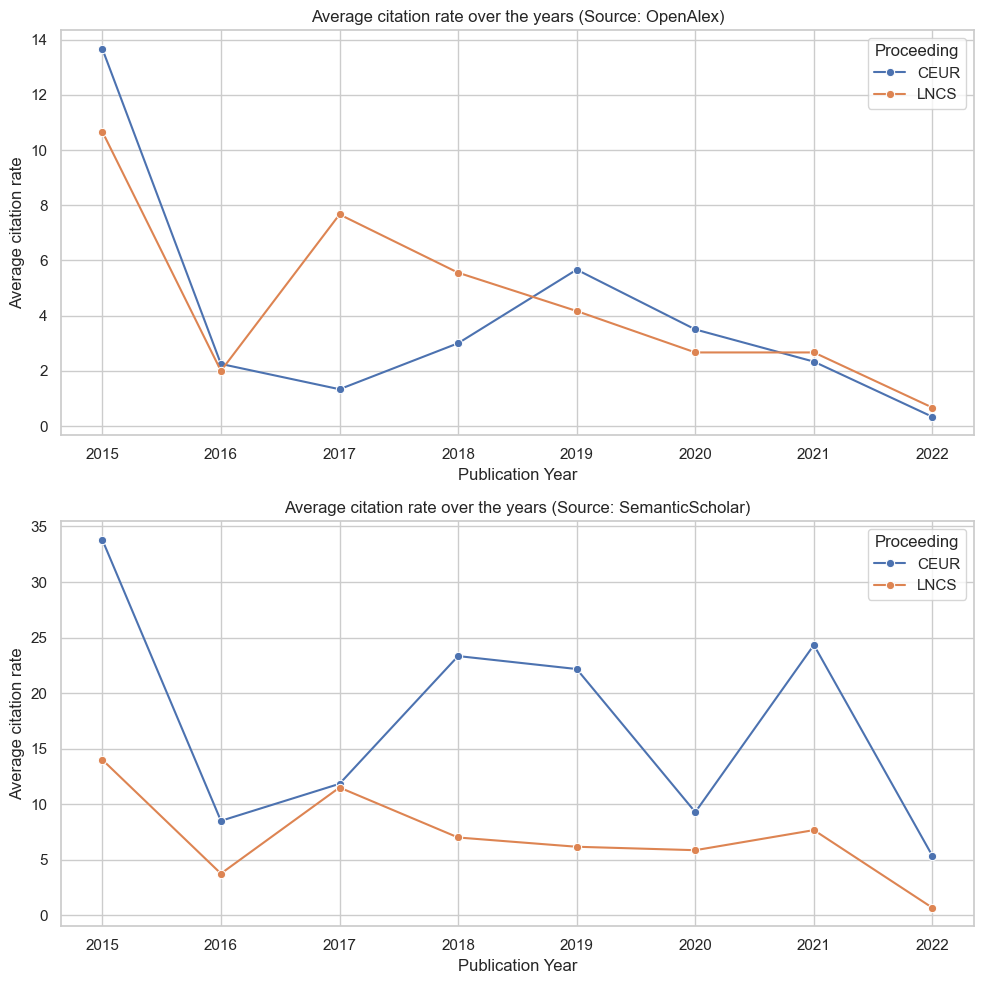

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

fig, axs = plt.subplots(2, 1, figsize=(10, 10))

sns.lineplot(ax=axs[0], data=df_compare_OpenAlex_avg, x='PubYear', y='Citations', hue='Proceeding', marker='o')
axs[0].set_title('Average citation rate over the years (Source: OpenAlex)')
axs[0].set_xlabel('Publication Year')
axs[0].set_ylabel('Average citation rate')

sns.lineplot(ax=axs[1], data=df_compare_Semantic_avg, x='PubYear', y='Citations', hue='Proceeding', marker='o')
axs[1].set_title('Average citation rate over the years (Source: SemanticScholar)')
axs[1].set_xlabel('Publication Year')
axs[1].set_ylabel('Average citation rate')

axs[0].legend(title='Proceeding')
axs[1].legend(title='Proceeding')

plt.tight_layout()
plt.savefig('../../../images/comparison_best_of_labs.png')
plt.show()

In [27]:
from scipy import stats
import numpy as np

# Extract citations for the two proceedings
citations_A = df_match_best_of_labs_OA['Citations_OpenAlex_LNCS']
citations_B = df_match_best_of_labs_OA['Citations_OpenAlex_CEUR']

# 1. Shapiro-Wilk Test for normality
shapiro_A_stat, shapiro_A_p = stats.shapiro(citations_A)
shapiro_B_stat, shapiro_B_p = stats.shapiro(citations_B)

print(f'Shapiro-Wilk Test for OpenAlex LNCS: Statistic={shapiro_A_stat}, P-Value={shapiro_A_p}')
print(f'Shapiro-Wilk Test for OpenAlex CEUR: Statistic={shapiro_B_stat}, P-Value={shapiro_B_p}')

# 2. Levene Test for equal variances
levene_stat, levene_p = stats.levene(citations_A, citations_B)

print(f'Levene Test: Statistic={levene_stat}, P-Value={levene_p}')

# 3. Perform the T-Test, based on the test results
# Decide based on the tests whether to perform the T-Test or a different test
if shapiro_A_p > 0.05 and shapiro_B_p > 0.05:
    print("Data is normally distributed.")
else:
    print("Data is not normally distributed. Consider using the Welch test or the Mann-Whitney U test.")

if levene_p > 0.05:
    print("Variances are equal.")
else:
    print("Variances are unequal. Consider using the Welch test instead of the standard T-Test.")

# Perform T-Test
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(citations_A, citations_B, alternative='two-sided')

print(f'T-Statistic: {mann_whitney_stat}')
print(f'P-Value: {mann_whitney_p}')

median_A = np.median(citations_A)
median_B = np.median(citations_B)

print(f'Median Citations for OpenAlex LNCS: {median_A}')
print(f'Median Citations for OpenAlex CEUR: {median_B}')

Shapiro-Wilk Test for OpenAlex LNCS: Statistic=0.8093581172179856, P-Value=3.151883805701547e-06
Shapiro-Wilk Test for OpenAlex CEUR: Statistic=0.4571605941619399, P-Value=8.108749892882602e-12
Levene Test: Statistic=0.014036718272560563, P-Value=0.9059540228086318
Data is not normally distributed. Consider using the Welch test or the Mann-Whitney U test.
Variances are equal.
T-Statistic: 1300.5
P-Value: 0.056525086892297786
Median Citations for OpenAlex LNCS: 3.5
Median Citations for OpenAlex CEUR: 2.0


In [29]:
from scipy import stats
import numpy as np

# Extract citations for the two proceedings
citations_A = df_match_best_of_labs_semantic['Citations_semantic_LNCS']
citations_B = df_match_best_of_labs_semantic['Citations_semantic_CEUR']

# 1. Shapiro-Wilk Test for normality
shapiro_A_stat, shapiro_A_p = stats.shapiro(citations_A)
shapiro_B_stat, shapiro_B_p = stats.shapiro(citations_B)

print(f'Shapiro-Wilk Test for OpenAlex LNCS: Statistic={shapiro_A_stat}, P-Value={shapiro_A_p}')
print(f'Shapiro-Wilk Test for OpenAlex CEUR: Statistic={shapiro_B_stat}, P-Value={shapiro_B_p}')

# 2. Levene Test for equal variances
levene_stat, levene_p = stats.levene(citations_A, citations_B)

print(f'Levene Test: Statistic={levene_stat}, P-Value={levene_p}')

# 3. Perform the T-Test, based on the test results
# Decide based on the tests whether to perform the T-Test or a different test
if shapiro_A_p > 0.05 and shapiro_B_p > 0.05:
    print("Data is normally distributed.")
else:
    print("Data is not normally distributed. Consider using the Welch test or the Mann-Whitney U test.")

if levene_p > 0.05:
    print("Variances are equal.")
else:
    print("Variances are unequal. Consider using the Welch test instead of the standard T-Test.")

# Perform T-Test
mann_whitney_stat, mann_whitney_p = stats.mannwhitneyu(citations_A, citations_B, alternative='two-sided')

print(f'T-Statistic: {mann_whitney_stat}')
print(f'P-Value: {mann_whitney_p}')

median_A = np.median(citations_A)
median_B = np.median(citations_B)

print(f'Median Citations for OpenAlex LNCS: {median_A}')
print(f'Median Citations for OpenAlex CEUR: {median_B}')

Shapiro-Wilk Test for OpenAlex LNCS: Statistic=0.8172605690943247, P-Value=4.797715654224964e-06
Shapiro-Wilk Test for OpenAlex CEUR: Statistic=0.7213281017041855, P-Value=5.1435854837674747e-08
Levene Test: Statistic=7.77492072427577, P-Value=0.006463803619964652
Data is not normally distributed. Consider using the Welch test or the Mann-Whitney U test.
Variances are unequal. Consider using the Welch test instead of the standard T-Test.
T-Statistic: 680.5
P-Value: 0.0031787234602095728
Median Citations for OpenAlex LNCS: 5.0
Median Citations for OpenAlex CEUR: 10.0
